<a href="https://colab.research.google.com/github/N8uce/Time-series-analysis/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%90%D0%BD_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/ДАТАСЕТЫ/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
#Отфильтровать данные только для региона 'Albany' тип продукта органический
df = df[df['region'] == 'Albany']
df = df[df['type'] == 'organic']

In [ ]:
df = df[["Date","AveragePrice"]]
df

,Date,AveragePrice
9126,2015-12-27,1.83
9127,2015-12-20,1.89
9128,2015-12-13,1.85
9129,2015-12-06,1.84
9130,2015-11-29,1.94
...,...,...
17608,2018-02-04,1.52
17609,2018-01-28,1.32
17610,2018-01-21,1.54
17611,2018-01-14,1.47


In [ ]:
# Преобразование столбца 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Сортировка DataFrame по столбцу 'Date'
df = df.sort_values('Date')

In [ ]:
# Сброс индексов DataFrame
df = df.reset_index(drop=True)
df

,Date,AveragePrice
0,2015-01-04,1.79
1,2015-01-11,1.77
2,2015-01-18,1.93
3,2015-01-25,1.89
4,2015-02-01,1.83
...,...,...
164,2018-02-25,1.56
165,2018-03-04,1.48
166,2018-03-11,1.68
167,2018-03-18,1.66


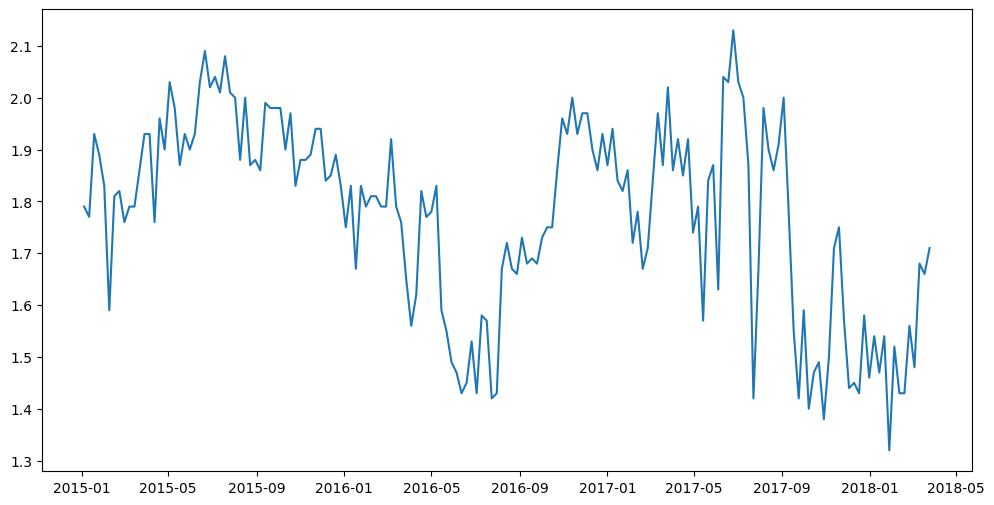

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['AveragePrice'])
plt.show()

In [ ]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

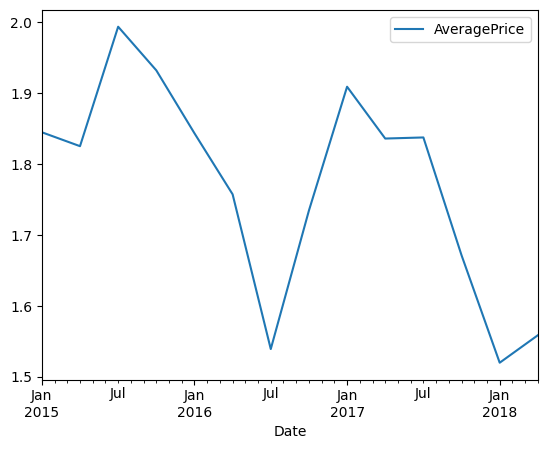

In [ ]:
# b. Укрупнение временных интервалов
df_resampled = df.resample(rule = '3M').mean()
df_resampled.plot()

<Axes: xlabel='Date'>

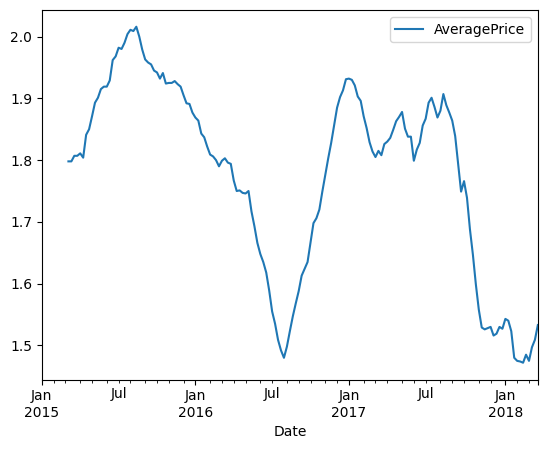

In [ ]:
# c. Скользящее среднее
df.rolling(window = 10).mean().plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2015-01-04 to 2018-03-25
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  169 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12
decompose = seasonal_decompose(df)

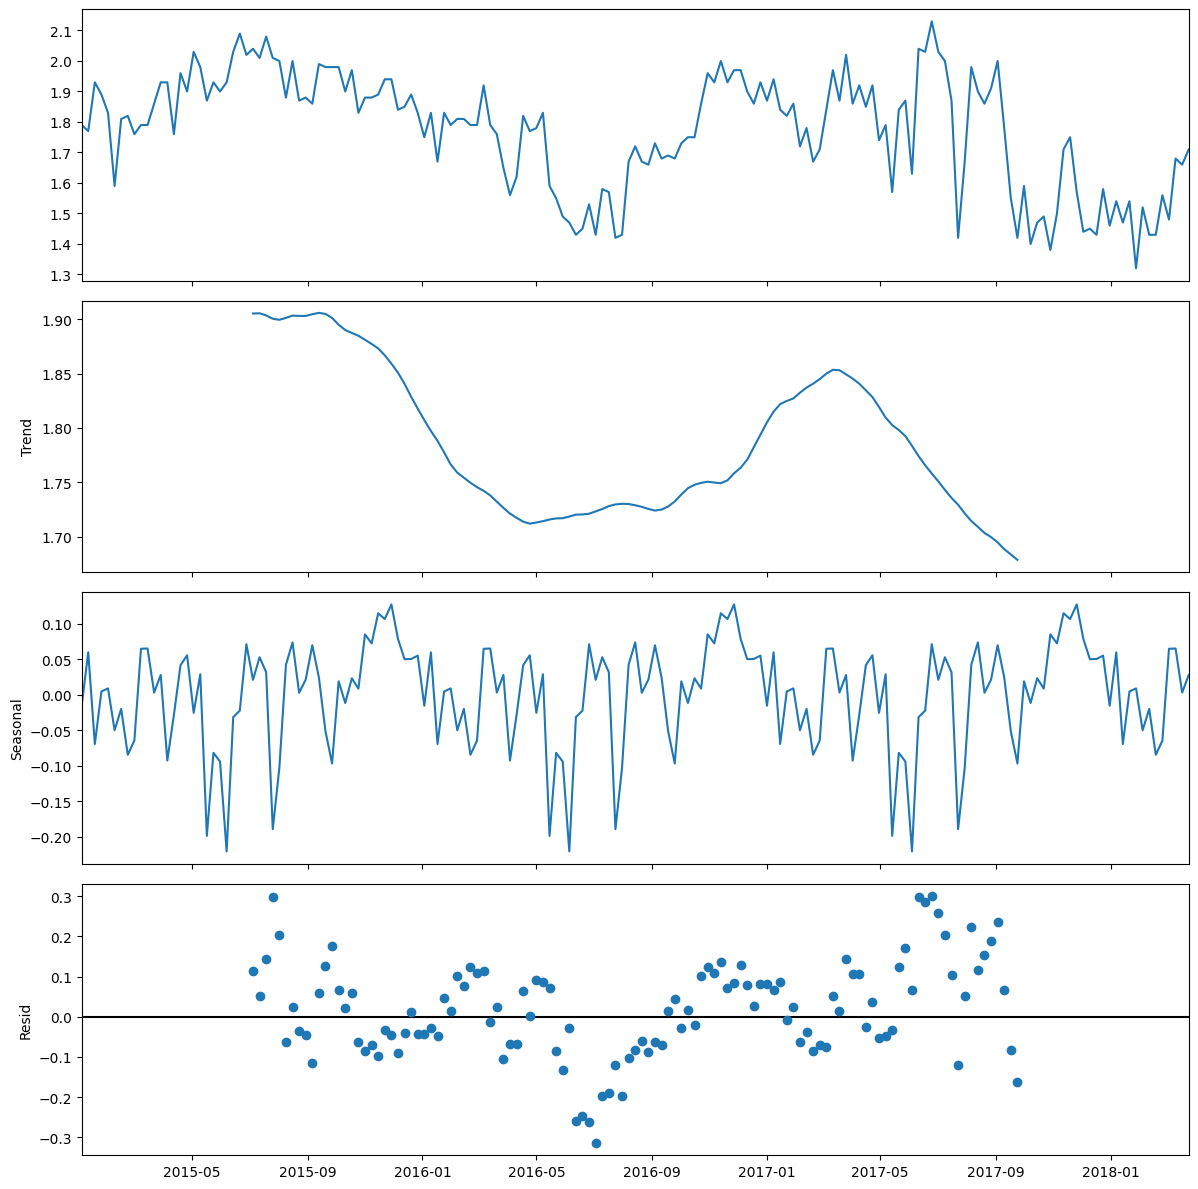

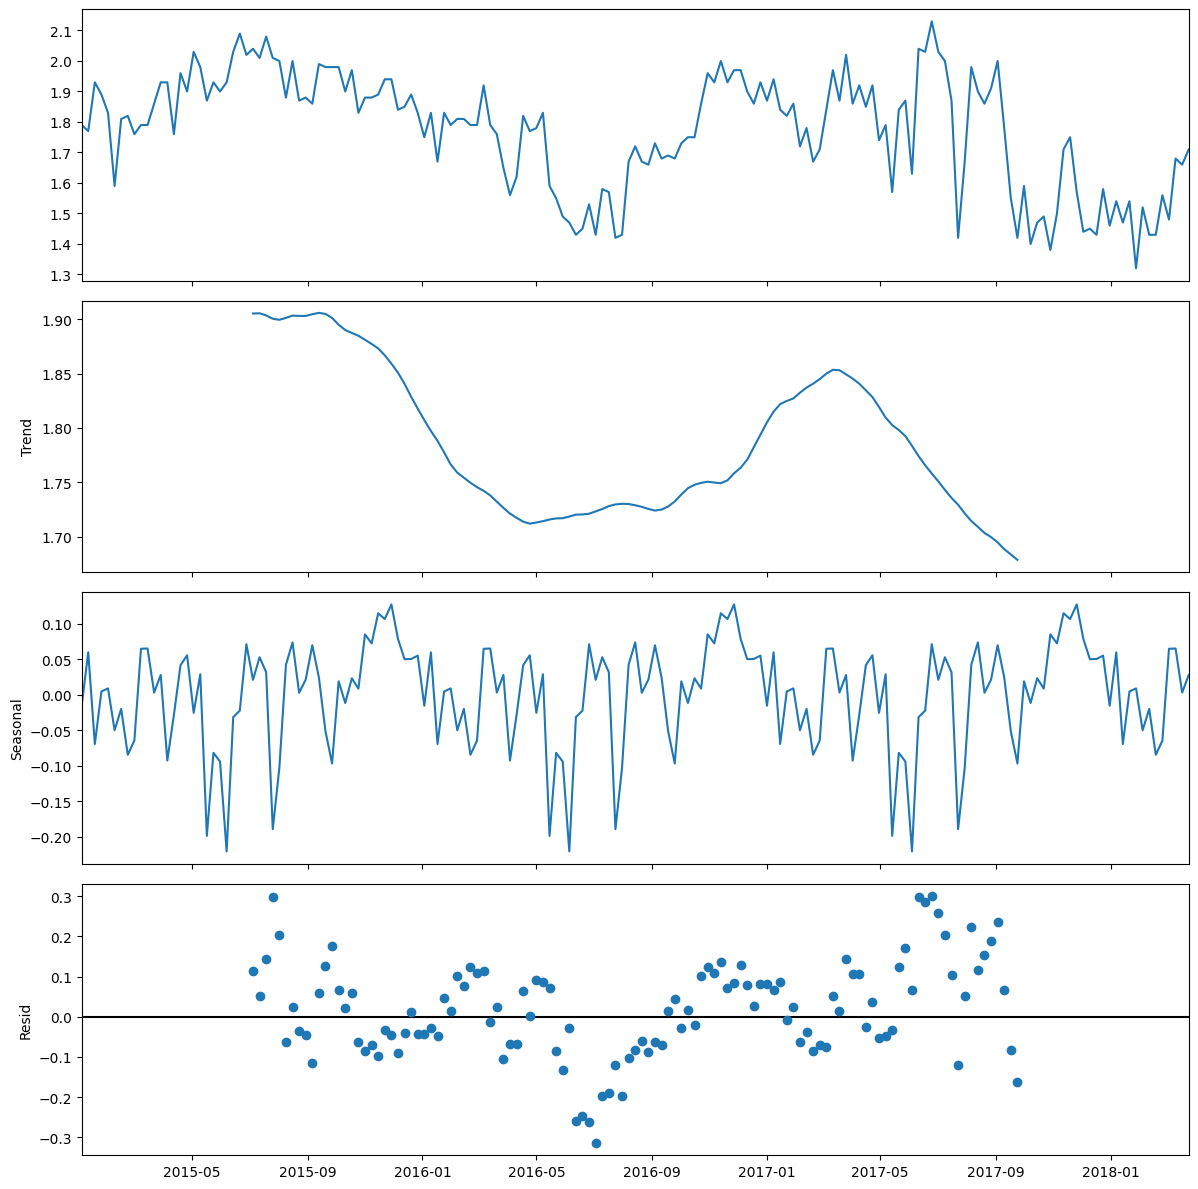

In [ ]:
decompose.plot()

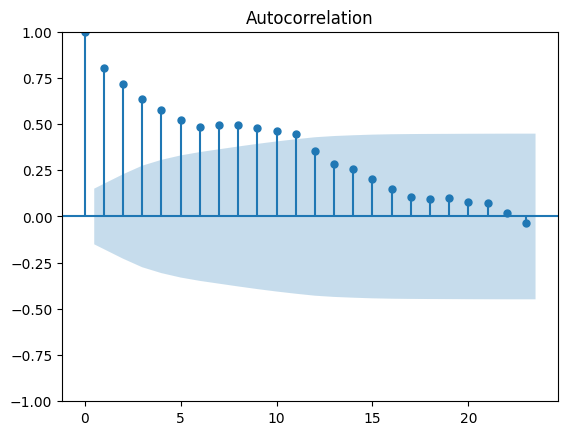

In [ ]:
 # импортируем автокорреляционную функцию (ACF)
from statsmodels.graphics.tsaplots import plot_acf

# применим функцию к нашему набору данных
plot_acf(df)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
for i in df.columns:
  print(i)
  rezult = adfuller(df[i])
  p=rezult[1]  #  p- значение
  print('p-value: %f' %p)
  alfa=0.05
  if p<alfa:
    print ("H1: стационарный ряд")
  else:
   print ("H0: нестационарный ряд")

AveragePrice
p-value: 0.016656
H1: стационарный ряд


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/ДАТАСЕТЫ/avocado.csv")
df = df[df['region'] == 'Albany']
df = df[df['type'] == 'organic']
df = df[["Date","AveragePrice"]]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.reset_index(drop=True)

In [ ]:
df

,Date,AveragePrice
0,2015-01-04,1.79
1,2015-01-11,1.77
2,2015-01-18,1.93
3,2015-01-25,1.89
4,2015-02-01,1.83
...,...,...
164,2018-02-25,1.56
165,2018-03-04,1.48
166,2018-03-11,1.68
167,2018-03-18,1.66


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.index.values.reshape(-1, 1)
y = df['AveragePrice']

poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)
y_pred_poly_3 = poly_model_3.predict(X_poly_3)
r2_poly_3 = r2_score(y, y_pred_poly_3)
print(f"R2 для полинома третьего порядка: {r2_poly_3}")

R2 для полинома третьего порядка: 0.2634381768119126


In [ ]:
df['Квартал'] = df['Date'].dt.quarter

quarter_dummies = pd.get_dummies(df['Квартал'], prefix='Квартал', drop_first=True)
df = pd.concat([df, quarter_dummies], axis=1)
df

,Date,AveragePrice,Квартал,Квартал_2,Квартал_3,Квартал_4
0,2015-01-04,1.79,1,False,False,False
1,2015-01-11,1.77,1,False,False,False
2,2015-01-18,1.93,1,False,False,False
3,2015-01-25,1.89,1,False,False,False
4,2015-02-01,1.83,1,False,False,False
...,...,...,...,...,...,...
164,2018-02-25,1.56,1,False,False,False
165,2018-03-04,1.48,1,False,False,False
166,2018-03-11,1.68,1,False,False,False
167,2018-03-18,1.66,1,False,False,False


In [ ]:
df = df.replace({True: 1, False: 0})
df

,Date,AveragePrice,Квартал,Квартал_2,Квартал_3,Квартал_4
0,2015-01-04,1.79,1,0,0,0
1,2015-01-11,1.77,1,0,0,0
2,2015-01-18,1.93,1,0,0,0
3,2015-01-25,1.89,1,0,0,0
4,2015-02-01,1.83,1,0,0,0
...,...,...,...,...,...,...
164,2018-02-25,1.56,1,0,0,0
165,2018-03-04,1.48,1,0,0,0
166,2018-03-11,1.68,1,0,0,0
167,2018-03-18,1.66,1,0,0,0


In [ ]:
df = df.drop(columns=['Date'])
df

,AveragePrice,Квартал,Квартал_2,Квартал_3,Квартал_4
0,1.79,1,0,0,0
1,1.77,1,0,0,0
2,1.93,1,0,0,0
3,1.89,1,0,0,0
4,1.83,1,0,0,0
...,...,...,...,...,...
164,1.56,1,0,0,0
165,1.48,1,0,0,0
166,1.68,1,0,0,0
167,1.66,1,0,0,0


In [ ]:
df = df.drop(columns=['Квартал'])
df

,AveragePrice,Квартал_2,Квартал_3,Квартал_4
0,1.79,0,0,0
1,1.77,0,0,0
2,1.93,0,0,0
3,1.89,0,0,0
4,1.83,0,0,0
...,...,...,...,...
164,1.56,0,0,0
165,1.48,0,0,0
166,1.68,0,0,0
167,1.66,0,0,0


In [ ]:
df['T'] = df.index
df

,AveragePrice,Квартал_2,Квартал_3,Квартал_4,T
0,1.79,0,0,0,0
1,1.77,0,0,0,1
2,1.93,0,0,0,2
3,1.89,0,0,0,3
4,1.83,0,0,0,4
...,...,...,...,...,...
164,1.56,0,0,0,164
165,1.48,0,0,0,165
166,1.68,0,0,0,166
167,1.66,0,0,0,167


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  169 non-null    float64
 1   Квартал_2     169 non-null    int64  
 2   Квартал_3     169 non-null    int64  
 3   Квартал_4     169 non-null    int64  
 4   T             169 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.7 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)
y_pred_poly_3 = poly_model_3.predict(X_poly_3)

In [ ]:
from sklearn.metrics import r2_score

y_actual = df['AveragePrice']

# Предсказанные значения модели
y_predicted = y_pred_poly_3

r2 = r2_score(y_actual, y_predicted)
print("R^2 score:", r2)


R^2 score: 0.5946151658561589


У трендовой модели куда выше R2 чем у простой

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/ДАТАСЕТЫ/avocado.csv")
df = df[df['region'] == 'Albany']
df = df[df['type'] == 'organic']
df = df[["Date","AveragePrice"]]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.reset_index(drop=True)
df.set_index('Date', inplace=True)
df


,AveragePrice
Date,
2015-01-04,1.79
2015-01-11,1.77
2015-01-18,1.93
2015-01-25,1.89
2015-02-01,1.83
...,...
2018-02-25,1.56
2018-03-04,1.48
2018-03-11,1.68


In [ ]:
train = df[:'2017-10-30']


test = df['2017-10-31':]

In [ ]:
train

,AveragePrice
Date,
2015-01-04,1.79
2015-01-11,1.77
2015-01-18,1.93
2015-01-25,1.89
2015-02-01,1.83
...,...
2017-10-01,1.59
2017-10-08,1.40
2017-10-15,1.47


In [ ]:
test

,AveragePrice
Date,
2017-11-05,1.50
2017-11-12,1.71
2017-11-19,1.75
2017-11-26,1.57
2017-12-03,1.44
2017-12-10,1.45
2017-12-17,1.43
2017-12-24,1.58
2017-12-31,1.46


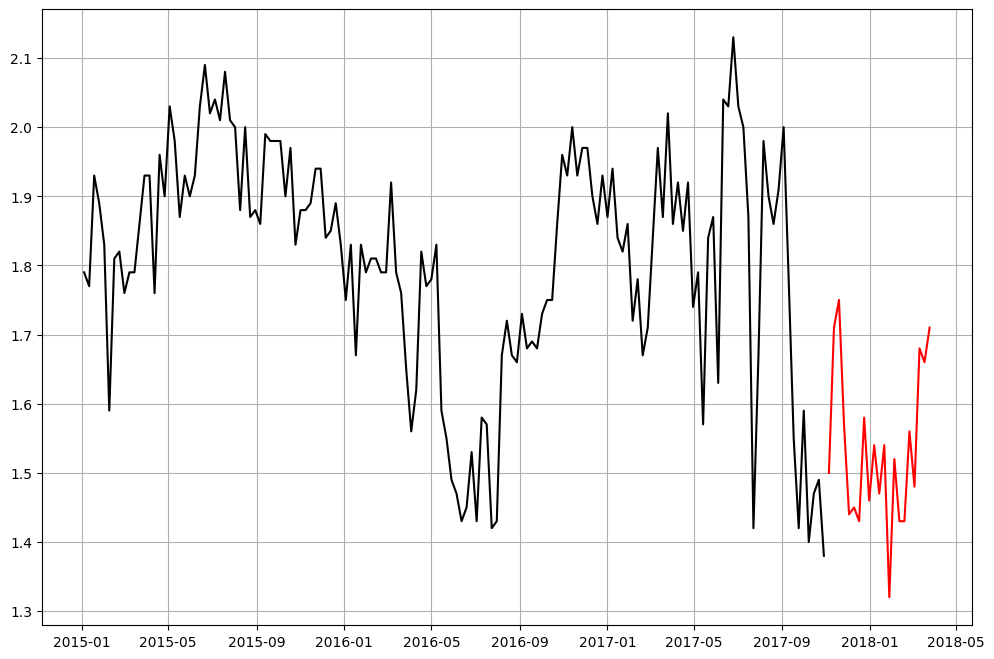

In [ ]:
plt.figure(figsize=(12,8))
#выведем эти данные на графике
plt.plot(train, color = "black")
plt.plot(test, color = "red")

#добавим сетку
plt.grid()

plt.show()

In [ ]:
#принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

#обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 12)

#импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

#создадим объект этой модели
model = SARIMAX(train,
                order = (1, 0, 0),
                seasonal_order = (0, 1, 0, 12))

#применим метод fit
result = model.fit()

In [ ]:
#мы можем посмотреть результат с помощью метода summary()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  148
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                  58.622
Date:                            Mon, 20 May 2024   AIC                           -113.245
Time:                                    15:49:53   BIC                           -107.419
Sample:                                01-04-2015   HQIC                          -110.877
                                     - 10-29-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6671      0.060     11.077      0.000       0.549       0.785
sigma2         0.0246      0.003   

In [ ]:
#тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

#и закончится в конце тестового
end = len(train) + len(test) - 1

#применим метод predict
predictions = result.predict(start, end)
predictions

2017-11-05    1.534478
2017-11-12    1.557185
2017-11-19    1.680633
2017-11-26    1.822025
2017-12-03    1.642817
2017-12-10    1.444067
2017-12-17    1.338239
2017-12-24    1.526887
2017-12-31    1.351283
2018-01-07    1.432395
2018-01-14    1.460973
2018-01-21    1.357594
2018-01-28    1.517183
2018-02-04    1.543835
2018-02-11    1.670328
2018-02-18    1.814070
2018-02-25    1.636677
2018-03-04    1.439327
2018-03-11    1.334581
2018-03-18    1.524063
2018-03-25    1.349103
Freq: W-SUN, Name: predicted_mean, dtype: float64

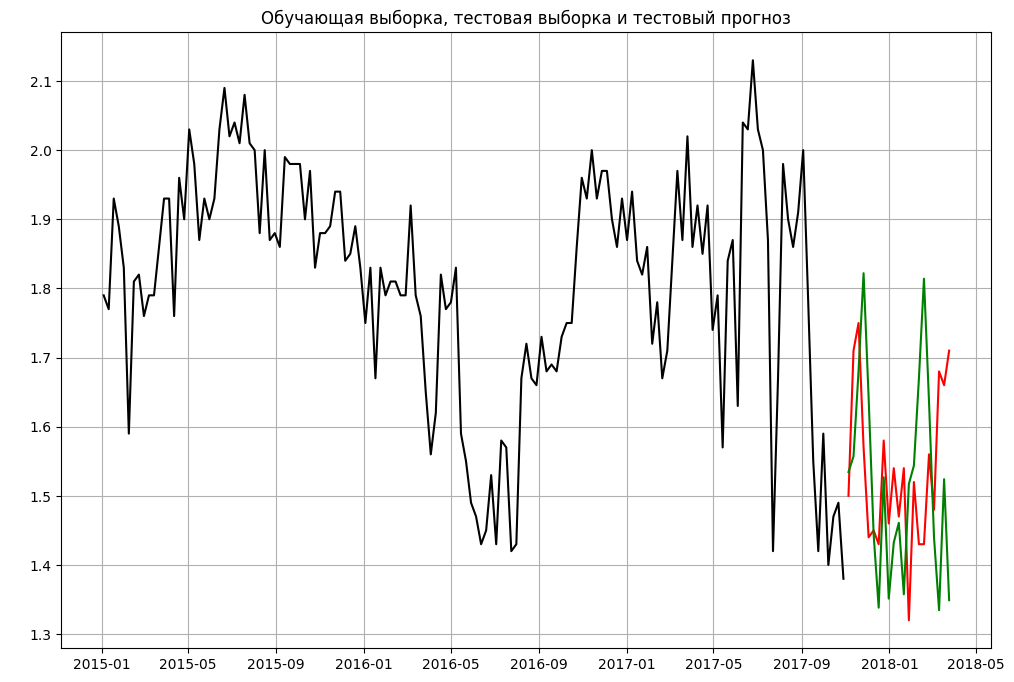

In [ ]:
#выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.figure(figsize=(12,8))
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')

#заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel(' ')
plt.xlabel('')

#добавим сетку
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# рассчитаем MSE
print(mean_squared_error(test, predictions))

# и RMSE
print(np.sqrt(mean_squared_error(test, predictions)))

0.03439631739299795
0.1854624420010638


In [ ]:
#прогнозный период начнется с конца имеющихся данных
start = len(df)

#и закончится 36 месяцев спустя
end = (len(df) - 1) + 3 * 12

#теперь построим прогноз на три года вперед
forecast = result.predict(start, end)

#посмотрим на весь 1963 год
forecast[-12:]

2018-09-16    1.459440
2018-09-23    1.482955
2018-09-30    1.375300
2018-10-07    1.496585
2018-10-14    1.590868
2018-10-21    1.730453
2018-10-28    1.880218
2018-11-04    1.700090
2018-11-11    1.496689
2018-11-18    1.384435
2018-11-25    1.566273
2018-12-02    1.384171
Freq: W-SUN, Name: predicted_mean, dtype: float64

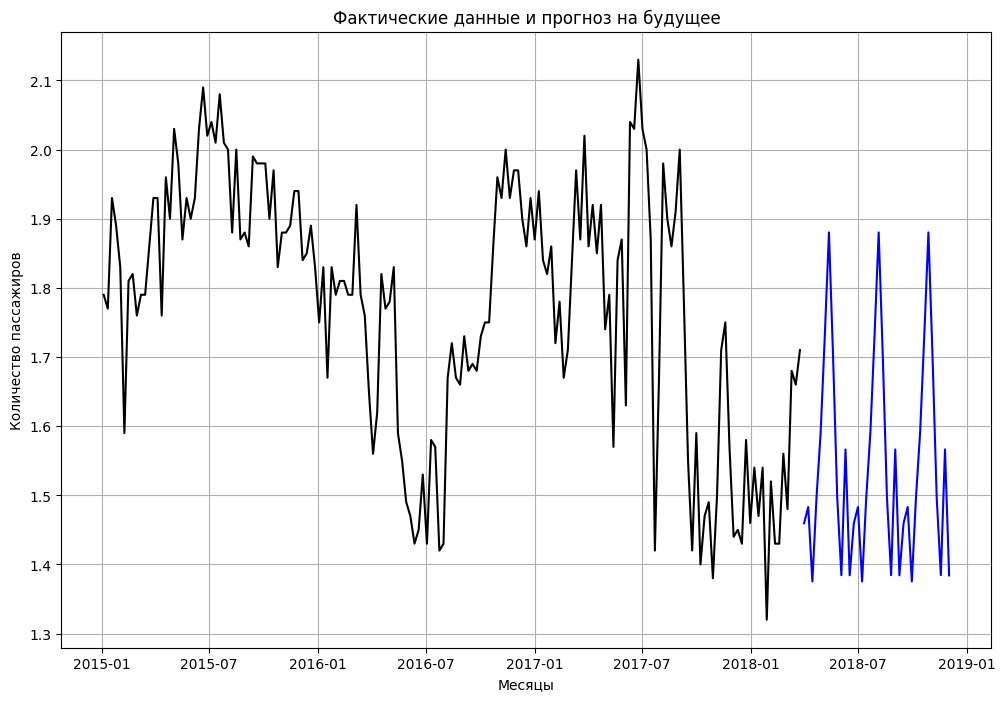

In [ ]:
#выведем две кривые (фактические данные и прогноз на будущее)
plt.figure(figsize=(12,8))
plt.plot(df, color = 'black')
plt.plot(forecast, color = 'blue')

#заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()